A mass of abnormal tissue is known as a tumor. There are two types of tumors: benign, which are non-cancerous and malignant, which are cancerous.

<h1> Data Analysis of the Wisconsin Breast Cancer dataset </h1>

In [184]:
import pandas as pd
import numpy as np

In [185]:
dataset = pd.read_csv("wisc_bc_data.csv")

In [186]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [187]:
dataset.shape

(569, 32)

In [188]:
dataset.info() # provide all necessary information about the breast cancer dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [189]:
dataset.groupby('diagnosis').size() # return an int representing the number of elements in an object

diagnosis
B    357
M    212
dtype: int64

In [190]:
# pd.value_counts(dataset['diagnosis']).index

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

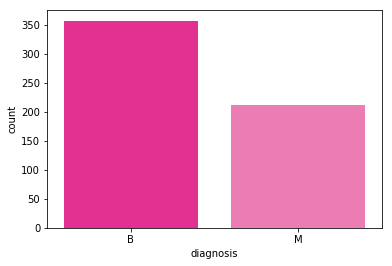

In [192]:
sns.countplot(dataset['diagnosis'], label = "Count", palette = sns.color_palette(['#FF1493', '#FF69B4']), 
              order = pd.value_counts(dataset['diagnosis']).index)
plt.show()

In [193]:
drop_id_dataset = dataset.drop("id", axis = 1)

In [194]:
bc_corr = drop_id_dataset.corr() # correlation between all features

In [195]:
bc_corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


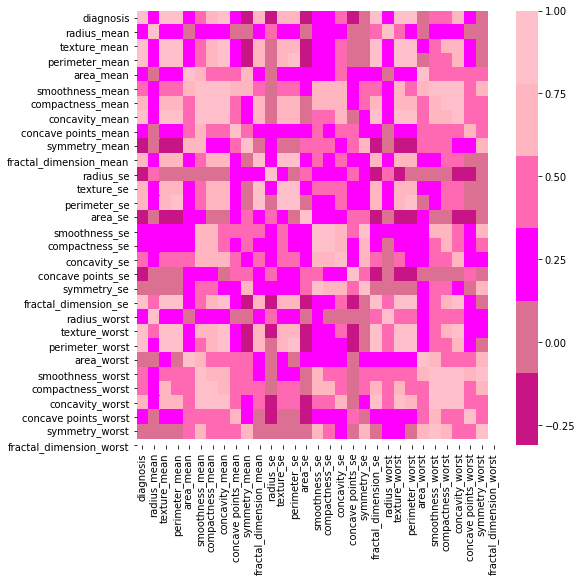

In [196]:
plt.figure(figsize=(8,8))

sns.heatmap(bc_corr, cbar = True, annot = False, yticklabels = drop_id_dataset.columns,
           cmap = ListedColormap(['#C71585', '#DB7093', '#FF00FF', '#FF69B4', '#FFB6C1', '#FFC0CB']),
           xticklabels = drop_id_dataset.columns)

plt.show()

In [197]:
high_corr = bc_corr.abs()
high_corr_unstack = high_corr.unstack() # unstacks the row to columns
high_corr_sort = high_corr_unstack.sort_values(ascending = False)

high_corr_sort[30:35] # the first 29 values will have a correlation of 1

radius_mean      perimeter_mean     0.997855
perimeter_mean   radius_mean        0.997855
radius_worst     perimeter_worst    0.993708
perimeter_worst  radius_worst       0.993708
radius_mean      area_mean          0.987357
dtype: float64

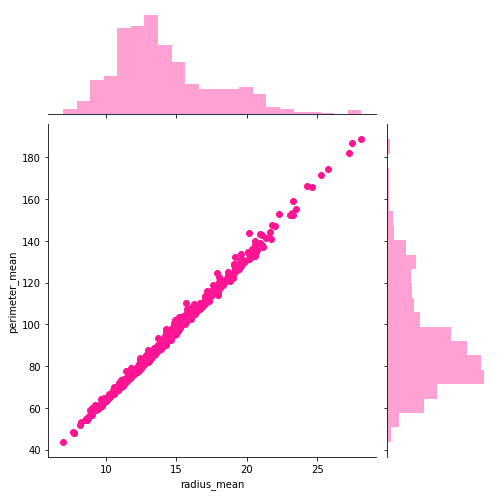

In [198]:
sns.jointplot('radius_mean', 'perimeter_mean', data = dataset, kind = "scatter", 
              space = 0.1, color="#FF1493", height = 7, ratio = 3) # plot two high-correlation variables from the dataset
plt.show()

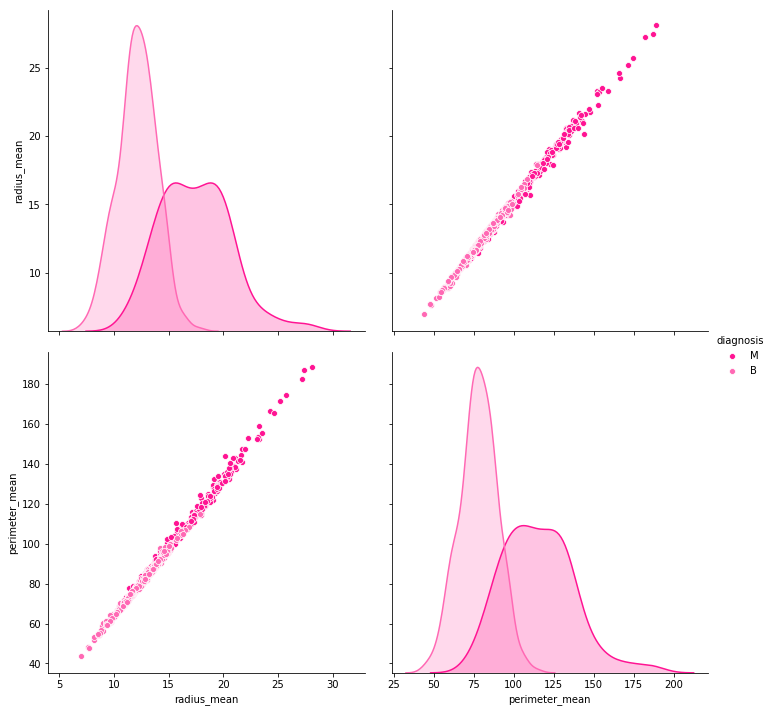

In [199]:
sns.pairplot(dataset, vars= ["radius_mean", "perimeter_mean"], palette = sns.color_palette(['#FF1493', '#FF69B4']), 
            hue = 'diagnosis', height=5) # visualize the relationship between two variables, where the variables can be continuous
plt.show()

<h1>Maching Learning</h1> <br>
To predict the diagnosis type using SVM : B/M <br>
Since this is a classification problem, I will attempt to solve it using SVM since it is an excellent classifier algorithm

In [200]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [201]:
# Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(drop_id_dataset.loc[:, drop_id_dataset.columns != 'diagnosis'],
                                                    drop_id_dataset['diagnosis'], stratify = drop_id_dataset['diagnosis'])

In [202]:
vector = SVC(gamma = 'auto')
vector.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [203]:
print("Support vector machine training set accuracy:", vector.score(X_train, y_train))
print("Support vector machine testing set accuracy:", round(vector.score(X_test, y_test),4))

Support vector machine training set accuracy: 1.0
Support vector machine testing set accuracy: 0.6294


In [204]:
# to avoid overfitting, we transform the values (scaling each feature to a given range)
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

In [205]:
vector_scaled = SVC(gamma = 'auto')
vector_scaled.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [206]:
print("Support vector machine training set accuracy:", round(vector_scaled.score(X_train_scaled, y_train),4))
print("Support vector machine testing set accuracy:", round(vector_scaled.score(X_test_scaled, y_test),4))

Support vector machine training set accuracy: 0.9507
Support vector machine testing set accuracy: 0.958


The accuracy will differ on each run because of variance in data split.